In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../federated")

from notears_libs.utils import set_random_seed, simulate_dag, simulate_parameter, simulate_linear_sem, count_accuracy
from notears_libs.linear import notears_linear

from utils import calculate_metrics

set_random_seed(1)

#### Dataset generation

In [2]:
n, d, s0, graph_type, sem_type = 20, 10, 20, 'ER', 'gauss'

adj_mat_true = simulate_parameter(simulate_dag(d, s0, graph_type))

dataset = simulate_linear_sem(adj_mat_true, n, sem_type)
print(f'Shape of dataset: {dataset.shape}')
print(f'Adjacency matrix: {adj_mat_true}')

Shape of dataset: (20, 10)
Adjacency matrix: [[ 0.          0.          0.         -1.79005082  0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          1.19322877  0.69840091  0.
   0.          0.          0.64312887 -1.46909137]
 [ 0.          0.          0.         -0.67798726  1.36487632  0.
   0.          0.          0.          1.28410494]
 [ 0.          0.          0.          0.          0.          1.63450309
   0.          0.          0.          0.51200407]
 [ 0.          0.          0.          0.53615244  0.          0.
   0.          0.         -0.88585275  1.03186584]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.         -1.56692325  0.          0.         -1.58252174  0.53582614
   0.          0.          0.          0.        ]
 [ 0.         -1.56536     0.          1.92924669  0.          0.
   0.          0.         -1.45714334  0.        ]
 [ 

#### Without belief aggregation

In [3]:
adj_mat_pred_nobelief = notears_linear(dataset, lambda1=0.1, loss_type='l2', ground_truth=adj_mat_true)

No prior provided, starting from scratch...
> 0 SHD = 20
> 1 SHD = 13
> 2 SHD = 16
> 3 SHD = 11
> 4 SHD = 9
> 5 SHD = 9
> 6 SHD = 9
> 7 SHD = 9
> 8 SHD = 9
> 9 SHD = 9
> 10 SHD = 9
> 11 SHD = 9
Done.


#### With belief aggregation

In [4]:
adj_mat_pred_belief = notears_linear(dataset, W_prior=adj_mat_true, lambda1=0.1, loss_type='l2', ground_truth=adj_mat_true)

Incorporating belief matrix...
Belief matrix incorporated.
> 0 SHD = 0
> 1 SHD = 13
> 2 SHD = 16
> 3 SHD = 11
> 4 SHD = 9
> 5 SHD = 9
> 6 SHD = 9
> 7 SHD = 9
> 8 SHD = 9
> 9 SHD = 9
> 10 SHD = 9
> 11 SHD = 9
Done.


#### Evaluation

In [5]:
calculate_metrics(adj_mat_pred_nobelief, adj_mat_true)

{'TP': 15,
 'TN': 66,
 'FP': 4,
 'FN': 5,
 'SHD': 9,
 'reverse': 0,
 'recall': 0.75,
 'precision': 0.7894736842105263}

In [6]:
calculate_metrics(adj_mat_pred_belief, adj_mat_true)

{'TP': 15,
 'TN': 66,
 'FP': 4,
 'FN': 5,
 'SHD': 9,
 'reverse': 0,
 'recall': 0.75,
 'precision': 0.7894736842105263}

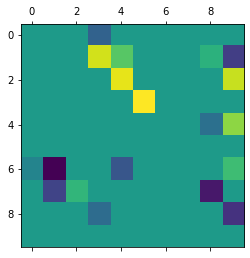

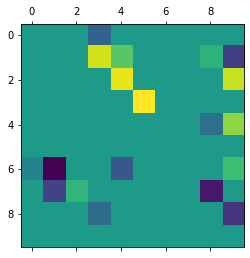

In [7]:
plt.matshow(adj_mat_pred_nobelief)
plt.matshow(adj_mat_pred_belief)